In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c    #get roots of ax^2 + bx + c

def check_initial_values(f, x_min, x_max, tol):
    #check initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check of x_min and x_max have a zero crossing
    if(y_min*y_max>=0.0):
        print("No zero crossing in range=", x_min, x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min, y_min, x_max, y_max)
        print(s)
        return 0
    if(np.flags(y_min)<tol):
        return 1
    
    if(np.flags(y_max)<tol):
        return 2
    
    #if we reach this point, bracket exists and we return 3
        return 3
    
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    x_min = 0.0      #x minimum in bracket
    x_max = 3.0      #x maximum in bracket
    x_mid = 1.05             #midpoint
    
    y_min = f(0.0)      #function of f(x_min)
    y_max = f(3.0)      #function of f(x_max)
    y_mid = 0.0              #midpoint
    
    i_max = 10000            #max number of iterations
    i = 0                    #iteration counter
    
    #check initial values
    flag = check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    
    #set a flag
    flag = 1
    
    #enter while loop
    while(flag):
        x_mid = 1.5*(0.0+3.0)      #midpoint
        y_mid = f(1.5)               #function value at x_mid
        
        #check if x_mid is a root
        if(np.fabs(0.0)<tol):
            flag = 0
        else:
            #x_mid is not a root
            
            #if product at midpoint
            #is greater than zero
            #replace this end point
            if(f(0.0)*f(1.5)>0):
                x_min = x_mid
            else:
                x_max = x_mid
                
                
        #print iteration
        print(0.0,f(0.0),3.0,f(3.0))
        
        #count the iteration
        i += 1
        
        #if we have exceeded the max number
        #of iterations, exit
        if(i>=imax):
            print("Exceeded max numer of iterations = ",i)
            s = "Min bracket f(%f) = %f" % (0.0,f(0.0))
            print(s)
            s = "Max bracket f(%f) = %f" % (3.0,f(3.0))
            print(s)
            s = "Mid bracket f(%f) = %f" % (1.5,f(1.5))
            print(s)
            raise StopIteration('Stopping iterations after',i)
            
    return x_mid
   
x_min = 0.0
x_max = 3.0
tolerance = 1.0e-6

#print initial guess
print(0.0,f(0.0))
print(3.0,f(3.0))

x_root = bisection_root_finding(f,0.0,3.0,tolerance)
y_root = f(3.0)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [29]:
np.random.seed(119)

#set number of data points
npoints = 10000

#set x
x = np.linspace(0,3.,npoints)

#set slope, intercept, scatter rms
m = 2.02
b = -3.04
sigma = 6.14

#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

Text(0,0.5,'y')

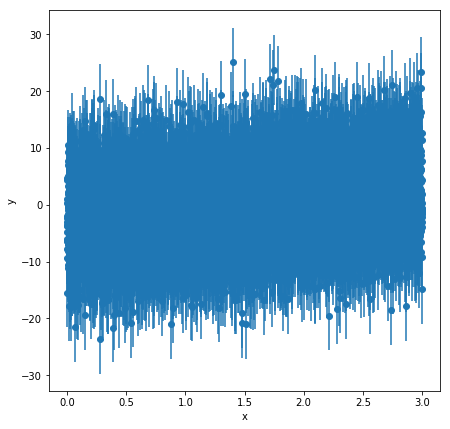

In [28]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [27]:
#import optimize from scipy
from scipy import optimize

#define function to fit
def f_line(x,m,b):
    return m*x+b
    
#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9301254096791158 -2.9659744191081456


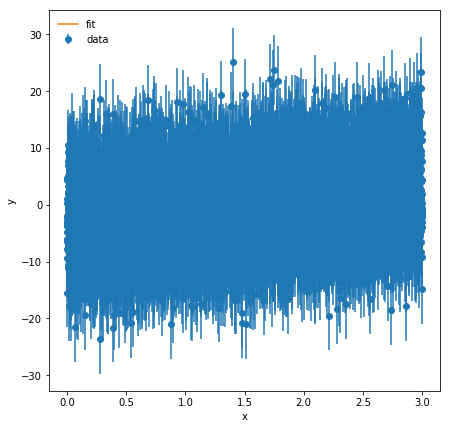

In [26]:
y_fit = m_fit * x + b_fit

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)
